# AP156 Week 1 (8 Aug 18)

In [1]:
import scipy.special as sps
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft

<b>1.2 The Nonlinear Pendulum</b>

Let us start with a physical model:

\begin{equation}
    E = \frac{m}{2} l^2 \dot{\phi}^2 - mgl \cos{\phi} = -mgl \cos{\phi_0}
\end{equation}

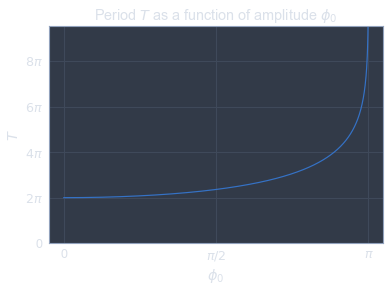

In [114]:
def T(phi0):
    return 4*sps.ellipk(np.sin(phi0/2)**2)

f,ax = mp.subplots()
phi0 = np.linspace(0,np.pi,1000)
ax.plot(phi0,T(phi0))
ax.xaxis.set_major_locator(mp.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(mp.MultipleLocator(np.pi/4))
ax.yaxis.set_major_locator(mp.MultipleLocator(2*np.pi))

def format_func_x(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N%2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)
    
def format_func_y(value,tick_number):
    N = int(np.round(value/np.pi))
    if N == 0:
        return "0"
    else:
        return r"${0}\pi$".format(N)
    
ax.xaxis.set_major_formatter(mp.FuncFormatter(format_func_x))
ax.yaxis.set_major_formatter(mp.FuncFormatter(format_func_y))
mp.ylim(0,30)
mp.xlabel("$\phi_0$")
mp.ylabel("$T$")
mp.title("Period $T$ as a function of amplitude $\phi_0$")

mp.show()

In [108]:
def psi(t,phi0):
    return sps.ellipj(t,np.sin(phi0/2)**2)[3]

def sinepsi(t,phi0):
    return sps.ellipj(t,np.sin(phi0/2)**2)[0]

def phinorm(x,phi0):
    l2 = np.sin(phi0/2)
    l3 = sinepsi(x*T(phi0),phi0)
    l4 = np.arcsin(l2*l3)
    return 2*l4/phi0

phi0 = np.linspace(0.1*np.pi,0.999*np.pi,5)

def ff(x):
    fflist = []
    for i in range(5):
        fflist.append(phinorm(x,phi0[i]))
    return fflist

flist = ff(x)

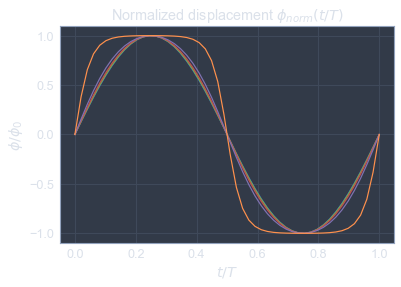

In [113]:
xx = np.linspace(0,1)
for i in range (5):
    mp.plot(xx,flist[i])
mp.xlabel("$t/T$")
mp.ylabel("$\phi/\phi_0$")
mp.title("Normalized displacement $\phi_{norm}(t/T)$")
mp.show()